###Imports

In [1]:
import keras
import numpy as np
import matplotlib.pyplot as plt
import math
import random

Using TensorFlow backend.


###Data Examination

In [0]:
from tensorflow.keras.datasets.cifar10 import load_data

In [3]:
dataset_size = 10000
(inps,labs), (tinps,tlabs) = load_data()
inps = inps[:dataset_size]
labs = labs[:dataset_size]

170500096/170498071 [==============================] - 6s 0us/step


In [4]:
print(np.shape(inps),np.shape(labs),np.shape(tinps),np.shape(tlabs))

(10000, 32, 32, 3) (10000, 1) (10000, 32, 32, 3) (10000, 1)


In [0]:
labs = keras.utils.to_categorical(labs, 10)
tlabs = keras.utils.to_categorical(tlabs, 10)

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


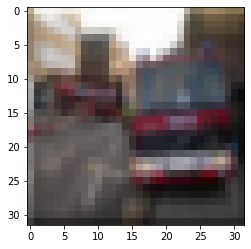

In [6]:
indx=int(random.random()*dataset_size)
plt.imshow(inps[indx])
print(labs[indx])

In [7]:
print(np.amax(inps[0]),np.amin(inps[0]))

255 0


### Tensorboard

In [8]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

--2020-02-07 22:30:59--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 34.237.57.234, 3.229.196.117, 52.204.140.35, ...
Connecting to bin.equinox.io (bin.equinox.io)|34.237.57.234|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 13773305 (13M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  13.13M  13.9MB/s    in 0.9s    

2020-02-07 22:31:00 (13.9 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [13773305/13773305]

Archive:  ngrok-stable-linux-amd64.zip
  inflating: ngrok                   


In [0]:
LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
get_ipython().system_raw('./ngrok http 6006 &')

In [11]:
! curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"


https://13177a39.ngrok.io


In [0]:
from keras.callbacks import TensorBoard
tbCallBack = TensorBoard(log_dir='./log', histogram_freq=1,
                         write_graph=True,
                         write_grads=True,
                         write_images=True)

###Network

In [13]:
from keras.layers import Conv2D, BatchNormalization, Dropout, Input, Dense, Flatten, MaxPool2D
from keras.models import Sequential


inzNet = Sequential()

inzNet.add(BatchNormalization())
inzNet.add(Conv2D(64,(5,5),activation='tanh',padding='same'))
inzNet.add(MaxPool2D())
inzNet.add(Dropout(0.2))

inzNet.add(BatchNormalization())
inzNet.add(Conv2D(128,(4,4),activation='tanh',padding='same'))
inzNet.add(MaxPool2D())
inzNet.add(Dropout(0.2))

inzNet.add(BatchNormalization())
inzNet.add(Conv2D(256,(3,3),activation='tanh',padding='same'))
inzNet.add(MaxPool2D())
inzNet.add(Dropout(0.2))

inzNet.add(Flatten())
inzNet.add(Dense(10,activation='softmax'))


In [14]:
from keras.optimizers import Adam
opt = Adam(lr = 0.001)
inzNet.compile(optimizer= opt,
                      loss = 'categorical_crossentropy',
                      metrics = ['accuracy'])

In [15]:
inzNet.fit(inps,labs,batch_size=100,epochs=10,callbacks=[tbCallBack],validation_split=0.1)












Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Train on 9000 samples, validate on 1000 samples




Epoch 1/10
9000/9000 [==============================] - 9s 1ms/step - loss: 1.9039 - acc: 0.3467 - val_loss: 1.6967 - val_acc: 0.4110

Epoch 2/10
9000/9000 [==============================] - 2s 179us/step - loss: 1.5707 - acc: 0.4651 - val_loss: 1.8127 - val_acc: 0.4170
Epoch 3/10
9000/9000 [==============================] - 2s 188us/step - loss: 1.4232 - acc: 0.5016 - val_loss: 1.5027 - val_acc: 0.4940
Epoch 4/10
9000/9000 [==============================] - 2s 191us/step - loss: 1.2230 - acc: 0.5676 - val_loss: 1.3450 - val_acc: 0.5410
Epoch 5/10
9000/9000 [==============================] - 2s 191us/step - loss: 1.0978 - acc: 0.6118 - val_loss: 1.3020 - val_acc: 0.5450
Epoch 6/10
9000/9000 [========================

In [16]:
inzNet.evaluate(tinps,tlabs)

10000/10000 [==============================] - 1s 123us/step


[1.258924466896057, 0.6001]

5
5


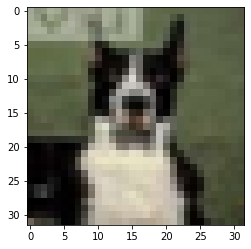

In [29]:
randind = int(random.random()*1000)
plt.imshow(tinps[randind])
print(np.argmax(inzNet.predict(tinps[[randind]])))
print(np.argmax(tlabs[randind]))